<a href="https://colab.research.google.com/github/HughClaimsend/MA5851_HughMcMullan_A3/blob/main/MA5851_A3_Document_Number_2_Hugh_McMullan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA5851 A3 Document Number 2 Hugh McMullan

**Task 2 - Web crawler and web scraping**

## a. Websites to be consumed

[*DJI*](https://dji.com) drone users visit forums and post articles and comments to the following websites (see logos/links in Figure 1 below):

[MavicPilots.com](https://mavicpilots.com)

[PhantomPilots.com](https://phantompilots.com)

[FPVDronePilots.com](https://fpvdronepilots.com)

[MatricePilots.com](https://matricepilots.com)

[CommercialDronePilots.com](https://commercialdronepilots.com)

[InspirePilots.com](https://inspirepilots.com)

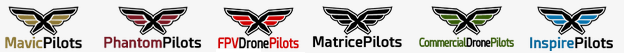

Figure 1: Drone-related websites for DJI drone users

## b. Rationale for extracting the web content

Most Australian drone pilots use DJI drones, DJI has the dominant market share (about 70% of drones in use) [source *DII*](https://droneii.com/product/drone-manufacturers-ranking).

Commercial drone users strongly tend towards the *Matrice*, *CommercialDronePilots* and *Inspire* sites [for larger drones]. Private/hobbyist drone users tend to access the other 3 sites.

Each site has areas for users to post new topics, and to comment on other users' posts.

Posted text comments, that present drone users' **interests** and **concerns** and **sentiments**, have been accessed and assessed by:

(1) **searching** the forums for the phrase **casa**; and

(2) working through the lists of topic postsings returned by the search [which spread across multiple pages]; then

(3) reading every user comment against those topics.

## c. Content coverage of the data extracted

The data items retrieved include:

(1) the **name of the site** accessed ['mavicpilots', 'phantompilots' etc];

(2) the **thread title** of the originally-posted topic [e.g. 'CASA rules on night flying ...' etc];

(3) the **date/time** the post was recorded;

(4) the **text** of the post/comment.

Based on the site name, a **site group** was recorded for each post ['Commercial' for the 'matrice', 'inspire' or 'commercialdronepilots' sites; or 'Private' for the other 3 sites].

**The user identifier** for the post was deliberately not recorded - to avoid the holding and potential spilling of any **personally-identifying information**.

##d. Complexity of the content layout

For each site, a search for 'casa' returned 1 or more pages of topic listings [up to 20 topics per page]. So a process was required to programmatically 'click' on the page-specific 'next page' [or 'page-number' links]. A maximum number of 10 pages of topics was used, for each site.

Each topic 'clicked into' returned 1 or more pages of posts for the clicked topic thread, up to 20 posts per page. While another 'page-number clicking' process could have been used, a limit of 20 posts per thread was convenient as a limiter on the total numbers of posts returned.

On the post pages, data items were *not* in named html fields - they needed to be extracted and parsed using specific *css* class types.

The datetime data was converted from an ISO8601-formatted string, to a python datetime data item.

##e. Website/data copyright considerations

The data extracted from these websites was solely for the purposes of this assessment, and falls under the general category of *academic research*.

There are no other purposes for this extraction of data, commercial or otherwise.

No personally-identifiable information has been extracted, or used in any way in this process.

##f. Metadata supplementation

All data needed for the assessment is obtained from the data extraction described here. No additional metadata was required.

##g. Content extractor to export the data

BeautifulSoup was the preferred toolset for parsing pages. The site pages were not able to be retieved with simple *request* calls, so *Selenium* was used to access the sites, passing called page resonses direct to *soup* objects.

Each site was structured identically, so a process looping through a set of site names and url locations was used.

From each site's home page, a Search for 'casa' was effected by extending the base URL as follows [the 'search_identifier' was a constant 5- or 6-digit figure required by each site separately]:

In [ ]:
# syntax for mavic/phantom etc websites
  search_url_base = url_base + "/search/" + search_identifier + "/?q=casa&o=relevance"

The Search would return multiple pages - those were iterated through for [arbitrarily-chosen] up to 10 pags of results, loading each reurned page of search results into a *BeautifulSoup* object [described below], using this logic:

In [ ]:
  for page in range(max_pages):    
    url_page = search_url_base + "&page=" + str(page + 1)   # incorporate search page no 
    soup = fetch_and_scrape_website(url_page)               # load the page into soup

Each returned *BeautifulSoup* object containing a web page of topic results was then iterated through, for each *thread* on the page, by searching the page for all occurrences of:

* the html 'h3' string, to get the thread *title*, and

* the *url extension* ['href'] leading to the page of posts for that particular thread.

For each thread found, a call was made to the *scrape_and_save_thread_pages* function, which itself would iterate through the individual posts found on that thread-related page.

In [ ]:
  # Run through all the threads found by the search
  threads = soup.find_all('h3',{'class':'contentRow-title'})
  items_count = 0
  for thread in threads:
    href = thread.find("a")["href"]
    thread_name = thread.find("a").text

    thread_url = url_base + strip_thread(href)

    scrape_and_save_thread_pages(dronesite_name, dronesite_group, thread_name, thread_url, max_items, output_filename)

Each thread page was seached for every html 'div' of class 'message-main' (to find the block of data for each comment posted), and that div was searched [again using html div classes] for these post-specific *datetime* and *text* fields.

The post data assembled was then saved by appending to a .csv file, as per the code below:

In [ ]:
# Save the posts data
list_to_save = [dronesite_name, dronesite_group, thread_name, thread_no, post_datetime, post_text]
save_post_to_csv(output_filename, list_to_save)

##h. Relevant python coding

In [ ]:
#Importing Selenium packages for crawling and scraping web pages
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# !apt-get update # to update ubuntu to correctly run apt install
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
#Import other libraries
from bs4 import BeautifulSoup     # BeautifulSoup for parsing scraped pages
import re                         # Regex functions
import csv                        # Writing to csv file
import datetime                   # Generating timestamps

In [ ]:
# function to fetch and scrape a website page
def fetch_and_scrape_website(url):
  # Fetch the web page [with Selenium]
  print("\nFETCHING ...", url)
  driver.get(url)       

  # Selenium hands the page source to Beautiful Soup
  soup = BeautifulSoup(driver.page_source, 'lxml')

  # Closes all browser windows and safely ends the session
  #driver.close()

  # return the soup object
  return(soup)

In [ ]:
def strip_thread(thread):
  rtn = thread
  if thread[-12:-7] == "post-":
    rtn = thread[:-12]
  return(rtn)

In [ ]:
# function to scrape a set of SEARCH RESULT pages using a page_no
def scrape_and_save_search_pages(dronesite_details_list, max_pages, max_items, output_filename):
  dronesite_name = dronesite_details_list[0]
  url_base = dronesite_details_list[1]
  search_identifier = dronesite_details_list[2]
  dronesite_group = dronesite_details_list[3]
  # print(dronesite_name)
  # print(dronesite_group)
  # print(url_base)
  # print(search_identifier)
  
  # syntax for mavic/phantom etc websites
  search_url_base = url_base + "/search/" + search_identifier + "/?q=casa&o=relevance"
  # print("Search thread:", search_url_base)
  # print("\n")

  for page in range(max_pages):    
    url_page = search_url_base + "&page=" + str(page + 1)   # incorporate search page no 
    soup = fetch_and_scrape_website(url_page)               # load the page into soup
    
    # Run through all the threads found by the search
    threads = soup.find_all('h3',{'class':'contentRow-title'})
    items_count = 0
    for thread in threads:
      href = thread.find("a")["href"]
      thread_name = thread.find("a").text

      # Print this block so scraping can be monitored
      print("\n=====================================================================")
      print("Search thread:", thread_name)
      print("=====================================================================")

      thread_url = url_base + strip_thread(href)

      scrape_and_save_thread_pages(dronesite_name, dronesite_group, thread_name, thread_url, max_items, output_filename)

      items_count += 1
      if items_count > max_items:
          break

In [ ]:
# function to scrape the FIRST THREAD page (even if there are multiple pages)
def scrape_and_save_thread_pages(dronesite_name, dronesite_group, thread_name, thread_url, max_items, output_filename):
  thread_no = thread_url[-7:]
  thread_no = thread_no[:-1]
  #print(thread_no, thread_name, thread_url)

  soup = fetch_and_scrape_website(thread_url)               # load the page into soup
    
  # Run through all the threads found by the search
  posts = soup.find_all('div',{'class':'message-main'})
  items_count = 0
  for post in posts:
    # Find and extract post data from the thread html
    post_datetime = post.find('time')["datetime"]
    post_article = post.find('article')
    post_text = post_article.find('div',{'class':'bbWrapper'})
    post_text = post_text.text
    # print("\n--------------------------------------------------------------------")
    # print("Posted at:", post_datetime)
    # print("--------------------------------------------------------------------")
    # print("Post text:", post_text)

    # Save the posts data
    list_to_save = [dronesite_name, dronesite_group, thread_name, thread_no, post_datetime, post_text]
    save_post_to_csv(output_filename, list_to_save)

    # Stop the loop if max no of post items is reached
    items_count += 1
    if items_count > max_items:
        break

In [ ]:
# Write the passed-in list of post details to a line in the .csv file
def save_post_to_csv(output_filename, list_input):
  try:
    with open(output_filename, "a" ) as fopen:    # Open the csv file
      csv_writer = csv.writer(fopen)
      csv_writer.writerow(list_input)
  except:
      return False


In [ ]:
# Set a list website targets for posts scraping
drone_website_targets = [
                         ["MavicPilots", "https://mavicpilots.com", "707065", "Private"],
                         ["PhantomPilots", "https://phantompilots.com", "213313", "Private"],
                         ["FPVDronePilots", "https://fpvdronepilots.com", "15671", "Private"],
                         ["CommercialDronePilots", "https://commercialdronepilots.com", "18113", "Commercial"],
                         ["MatricePilots", "https://matricepilots.com", "49374", "Commercial" ],
                         ["InspirePilots", "https://inspirepilots.com", "56174", "Commercial"]
]

# Set arbitrary limits to avoid too many calls to website(s)
max_page_calls = 10
max_items_per_page = 20

# Initialise dronesite_output file
datetime_now = datetime.datetime.now()
timestamp = datetime_now.strftime("%Y%m%d%H%M")
dronesite_output_filename = "DronePosts_" + timestamp + ".csv"
#print(dronesite_output_filename)

In [ ]:
# Run through the 'CASA' Search pages for each target website
for dronesite_details_list in drone_website_targets:
  scrape_and_save_search_pages(dronesite_details_list, max_page_calls, max_items_per_page, dronesite_output_filename)


##i. Demonstration of the application running

**SAMPLE SCREENSHOT DURING PRODUCTION RUN**

Figure 2 below shows a brief screenshot used to monitor **the production run**, crawling and scraping and exporting process across all 6 sites, up to 10 pages of search results per site, up to 20 posts per thread on the seach pages.

In this run, the debug monitoring output was turned OFF.

The monitoring listed just each Selenium page access.

The production process ran for approximately 5 hours.

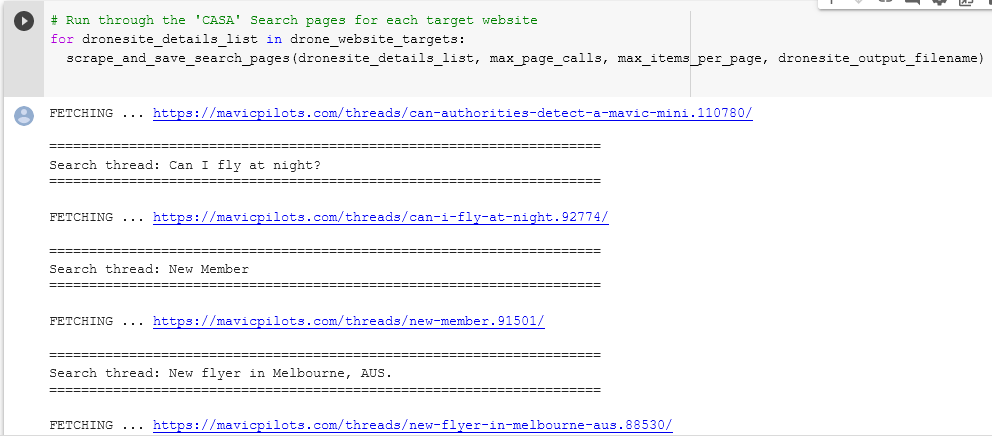

Figure 2: Screenshot iterating the 'casa' search/threads/posts pages

**SAMPLE SCREENSHOT DURING TEST RUN**

Figure 3 below shows a screenshot from a **limited test process**, with **all monitoring messages** turned ON [including displaying parsed text].

This test process searched just 1 site, maximum 2 search pages, max 4 posts per thread.

This test process ran for under 1 minute.


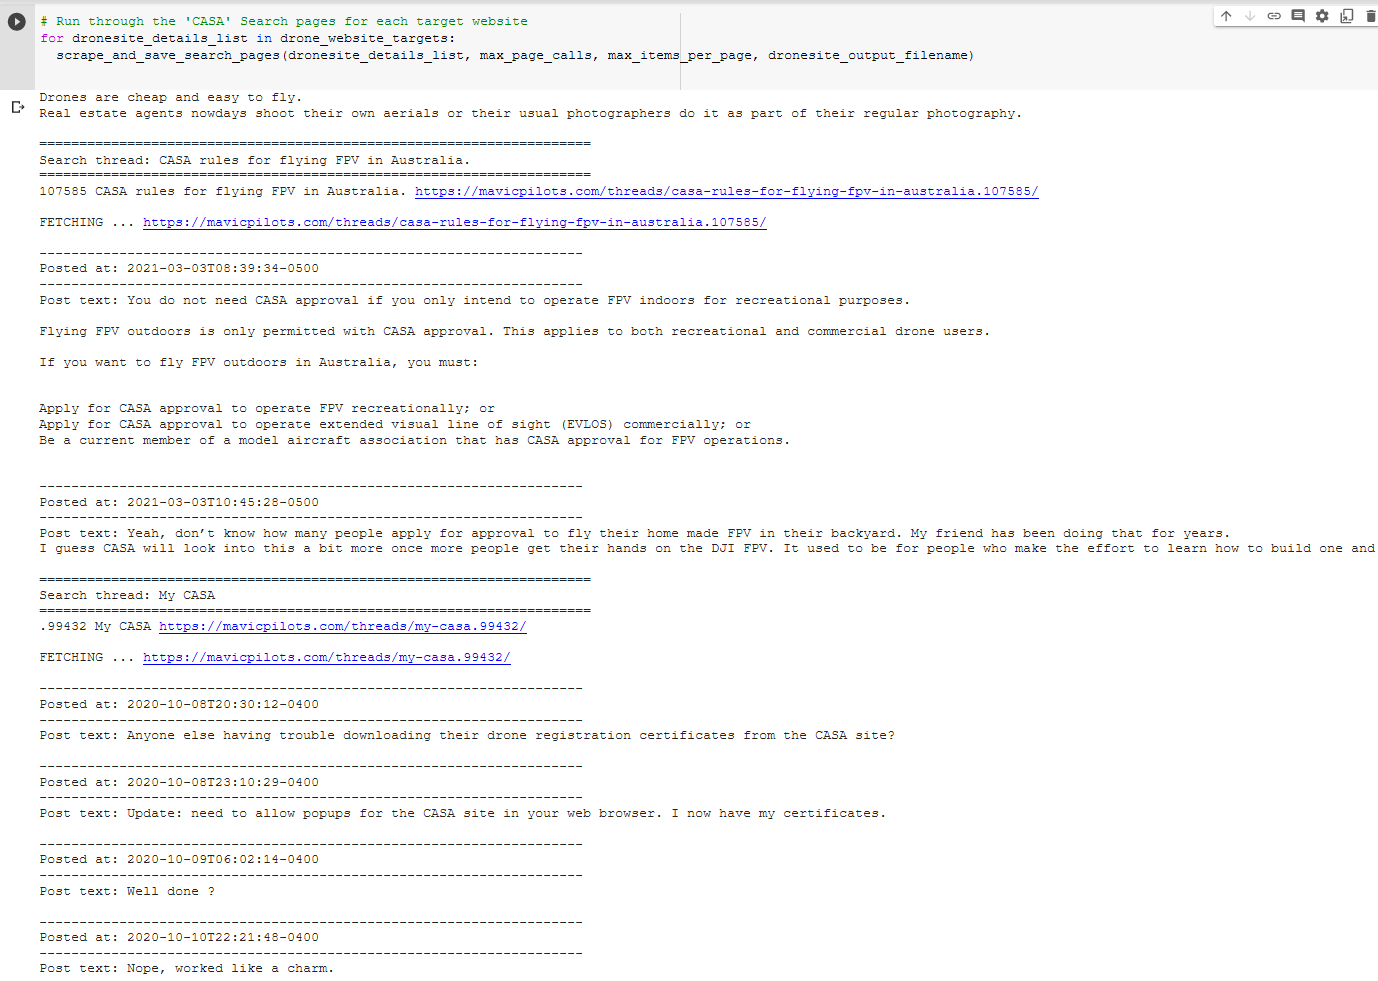

Figure 3: Screenshot of TEST process running with all monitoring turned ON

##j. Methodology of process, cleaning and storing harvested data for NLP tasking

**Saved extracted posts data:**
During the crawling and scraping process [as described above] each extracted post was saved, one-by-one as they were created, to a .csv file.

The output file name was set before the run started:

In [ ]:
dronesite_output_filename = "DronePosts_" + timestamp + ".csv"

The **code for the cleaning process was initialised** as follows:

In [ ]:
# Import libraries needed for this notebook
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The actual output file name for the production run was: **DronePosts_202112010705.csv**

To start the pre-processing work, the data was retrieved from that file [located on Google Drive, for convenience working with *Google Colab*.

The data was read back in from the file as follows:

In [ ]:
# Read in the DronePosts.csv data, created in the Part 1 notebook
dronepost_header_list = ["dronesite_name", "dronesite_group", "thread_name", "thread_no", "post_datetime", "post_text"]
dfDronePosts = pd.read_csv('/content/drive/MyDrive/DronePosts_202112010705.csv', names=dronepost_header_list)
display(dfDronePosts)

,dronesite_name,dronesite_group,thread_name,thread_no,post_datetime,post_text
0,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:15:52-0400,..\nLatest CASA newsletter has VLOS article wh...
1,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:27:14-0400,I'm guessing they're making a distinction betw...
2,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T21:24:11-0400,"If it’s like the US, the expectation is to use..."
3,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T22:07:39-0400,CASA is not trying to tell us to keep our eyes...
4,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T23:27:14-0400,\n\nthispilothere said:\n\n\n\nI'm guessing th...
...,...,...,...,...,...,...
14858,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:17:28-0400,\n\nBrendan said:\n\n\n\n\t\t\tWell looks like...
14859,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:57:25-0400,\n\nIan Fraser said:\n\n\n\n\t\t\tOne huge pro...
14860,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T22:19:11-0400,\n\nBrendan said:\n\n\n\n\t\t\tAs someone who ...
14861,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-10T18:15:41-0400,The big restriction with this sub 2kg ruling i...


For sorting and selecting by month and year posted, 2 additional fields *post_YYYY* and *post_YYMM* were added as follows:

In [ ]:
dfDronePosts['post_YYMM'] = dfDronePosts['post_datetime'].apply(lambda s: datetime.fromisoformat(s[:-5].replace("T", " ")).strftime("%Y%m")[-4:])
dfDronePosts['post_YYYY'] = dfDronePosts['post_YYMM'].apply(lambda s: "20" + s[:-2])
display(dfDronePosts)

,dronesite_name,dronesite_group,thread_name,thread_no,post_datetime,post_text,post_YYMM,post_YYYY
0,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:15:52-0400,..\nLatest CASA newsletter has VLOS article wh...,2110,2021
1,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:27:14-0400,I'm guessing they're making a distinction betw...,2110,2021
2,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T21:24:11-0400,"If it’s like the US, the expectation is to use...",2110,2021
3,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T22:07:39-0400,CASA is not trying to tell us to keep our eyes...,2110,2021
4,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T23:27:14-0400,\n\nthispilothere said:\n\n\n\nI'm guessing th...,2110,2021
...,...,...,...,...,...,...,...,...
14858,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:17:28-0400,\n\nBrendan said:\n\n\n\n\t\t\tWell looks like...,1506,2015
14859,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:57:25-0400,\n\nIan Fraser said:\n\n\n\n\t\t\tOne huge pro...,1506,2015
14860,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T22:19:11-0400,\n\nBrendan said:\n\n\n\n\t\t\tAs someone who ...,1506,2015
14861,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-10T18:15:41-0400,The big restriction with this sub 2kg ruling i...,1506,2015


**Numbers of posts by Site by Year**

To select the best numbers of posts (between 5-10,000, spread across Commercial and Private drone users), 2 pivot tables and a stacked bar chart were generated:

In [ ]:
pivotPostsBySite = dfDronePosts.pivot_table(values='dronesite_group', index='post_YYYY', columns='dronesite_name', aggfunc='count', fill_value=0)
pivotPostsBySite

dronesite_name,CommercialDronePilots,FPVDronePilots,InspirePilots,MatricePilots,MavicPilots,PhantomPilots
post_YYYY,,,,,,
2013,0,0,0,0,0,20
2015,0,0,984,2278,0,2
2016,0,110,1637,1255,80,80
2017,0,0,139,1,0,609
2018,2188,0,143,9,21,846
2019,76,0,17,0,67,1214
2020,14,0,52,0,818,117
2021,17,30,100,0,1850,89


In [ ]:
pivotPostsByGroup = dfDronePosts.pivot_table(values='dronesite_name', index='post_YYYY', columns='dronesite_group', aggfunc='count', fill_value=0)
pivotPostsByGroup

dronesite_group,Commercial,Private
post_YYYY,,
2013,0,20
2015,3262,2
2016,2892,270
2017,140,609
2018,2340,867
2019,93,1281
2020,66,935
2021,117,1969


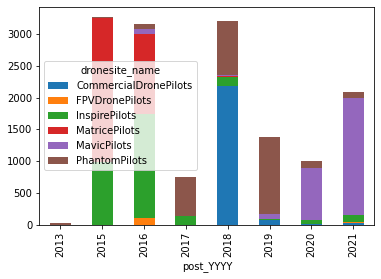

In [ ]:
dfDronePosts.groupby('post_YYYY')['dronesite_name']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

That lead to a choice to **take posts from 2018 onwards**

In [ ]:
dfSince2018 = dfDronePosts[dfDronePosts['post_YYYY'] >= '2018'][['dronesite_group', 'thread_name', 'post_YYMM', 'post_YYYY', 'post_text']]
display(dfSince2018)

,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text
0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...
1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...
2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use..."
3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...
4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...
...,...,...,...,...,...
12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...
12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...
12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...
12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ..."


**Exploratory Data Analysis on extracted data**

The dataframe containg the scraped data [since 2018] had the shape below:

In [ ]:
dfSince2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 0 to 14842
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   dronesite_group  7668 non-null   object
 1   thread_name      7668 non-null   object
 2   post_YYMM        7668 non-null   object
 3   post_YYYY        7668 non-null   object
 4   post_text        7667 non-null   object
dtypes: object(5)
memory usage: 359.4+ KB


There was a mismatch in column lengths - corrected by dropping NA values:

In [ ]:
dfSince2018 = dfSince2018.dropna()
dfSince2018

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...
...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...


A histogram showed an imbalanced pile of Commercial posts at the start of 2018. These were retained, initially, to get a reasonable number of posts for the topic modelling. 

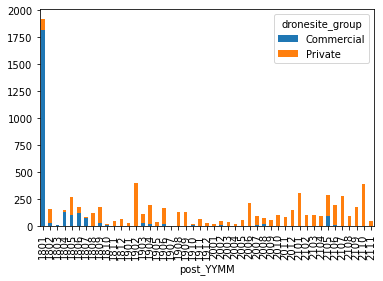

In [ ]:
dfSince2018.groupby('post_YYMM')['dronesite_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

The extracted data was saved, and a new dataframe **dfPreppedText** was used to keep the extracted data separate from the pre-processed data, to enable the pre=processing to be restarted if required.

In [ ]:
dfSince2018.to_csv('/content/drive/MyDrive/DronePostsSince2018_202112041100.csv')

In [ ]:
dfPreppedText = dfDronePostsSince2018

**NLP pre-processing libraries were loaded**

In [ ]:
# Import libraries needed for this notebook
import re

import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Constants were established for code readability

In [ ]:
# NLTK constants
PATTERN_S = re.compile("\'s")           # matches `'s` from text
PATTERN_R = re.compile("\r")            #matches `\r`
PATTERN_N = re.compile("\n")            #matches `\r` and `\n`
PATTERN_PUNC = re.compile(r"[^\w\s]")   # matches all non 0-9 A-z whitespace
STOPWORDS = set(stopwords.words('english'))

Functions were set up to remove unwanted characters and convert text to lowercase, remove stopwords, and store the resulatant text in a new colum *cleaned_text*

In [ ]:
# function for text cleaning 
def clean_text_using_nltk(text):
    text = text.lower()                     # Convert text to lowercase 

    text = re.sub(PATTERN_S, ' ', text)     # Remove apostrophe-s
    text = re.sub(PATTERN_R, ' ', text)     # Remove escaped \r characters
    text = re.sub(PATTERN_N, ' ', text)     # Remove escaped \n characters
    text = re.sub(PATTERN_PUNC, ' ', text)  # Remove non 0-9 A-z whitespace
    
    return text

# Apply the text cleaning function to the target_text
dfPreppedText['cleaned_text'] = dfPreppedText['target_text'].apply(lambda s: clean_text_using_nltk(s))

In [ ]:
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in STOPWORDS]
    return ' '.join(no_stopword_text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['cleaned_text'] = dfPreppedText['cleaned_text'].apply(lambda s: remove_stopwords(s))

A function was established to tokenise the cleaned_text and store the result in a new column *tokenized_text*

In [ ]:
# function to tokenize text
def apply_tokenizer(text):
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')    # use NLTK Regexp tokenizer
    return tokenizer.tokenize(text)

# Apply the stopwords removal function to the corpus text
dfPreppedText['tokenized_text'] = dfPreppedText['cleaned_text'].apply(lambda s: apply_tokenizer(s))

**Now also STEMMING the text as well**

When Topic Modelling [see Document 3] was carried, the key words included **both** 'fly' and 'flying'.  

That was unsatisfactory, so STEMMING was added, saving the new field as *stemmed_text*:

In [ ]:
# function to stem text
def apply_stemmer(text):
  stemmer=PorterStemmer()
  words = [stemmer.stem(word) for word in text]
  return words

# Apply the stemming function to the tokenized corpus text
dfPreppedText['stemmed_text'] = dfPreppedText['tokenized_text'].apply(lambda s: apply_stemmer(s))

Finally the pre-processed data was stored into .csv as well

In [ ]:
dfPreppedText.to_csv('/content/drive/MyDrive/DronePostsPreppedText_202112051330.csv')

Last, separate dataframes were selected [and saved] for **Commercial** and **Private** [drone users]:

In [ ]:
# Separate COMMERCIAL corpus from dfPreppedText
dfCommercial = dfPreppedText[dfPreppedText["dronesite_group"]=="Commercial"]
dfCommercial

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
5052,5953,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
5053,5954,Commercial,What is the process of ReOC,2106,2021,\n\nSteveChan said:\n\n\n\n\t\t\tHi Guys. Im n...,What is the process of ReOC \n\nSteveChan said...,process reoc stevechan said hi guys im new enr...,"[process, reoc, stevechan, said, hi, guys, im,...","[process, reoc, stevechan, said, hi, guy, im, ..."
5054,5955,Commercial,What is the process of ReOC,2106,2021,"Given that this is an international forum, the...",What is the process of ReOC Given that this is...,process reoc given international forum minimum...,"[process, reoc, given, international, forum, m...","[process, reoc, given, intern, forum, minimum,..."
5055,5956,Commercial,What is the process of ReOC,2106,2021,Mate there are documents that you can use on t...,What is the process of ReOC Mate there are doc...,process reoc mate documents use casa website c...,"[process, reoc, mate, documents, use, casa, we...","[process, reoc, mate, document, use, casa, web..."
5056,5957,Commercial,What is the process of ReOC,2106,2021,Hi Guys. Im new here. I just enrolled the RePL...,What is the process of ReOC Hi Guys. Im new he...,process reoc hi guys im new enrolled repl reoc...,"[process, reoc, hi, guys, im, new, enrolled, r...","[process, reoc, hi, guy, im, new, enrol, repl,..."
...,...,...,...,...,...,...,...,...,...,...
7663,12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...,Litchi wapoint missions Would anyone be intere...,litchi wapoint missions would anyone intereste...,"[litchi, wapoint, missions, would, anyone, int...","[litchi, wapoint, mission, would, anyon, inter..."
7664,12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...,Beseno Castle in 6K \n\n\n\n\nCastel Beseno is...,beseno castle 6k castel beseno impressive fort...,"[beseno, castle, castel, beseno, impressive, f...","[beseno, castl, castel, beseno, impress, fortr..."
7665,12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...,Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."
7666,12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ...",Val Formazza Mountains and a stunning Waterfal...,val formazza mountains stunning waterfall cine...,"[val, formazza, mountains, stunning, waterfall...","[val, formazza, mountain, stun, waterfal, cine..."


In [ ]:
dfCommercial.to_csv('/content/drive/MyDrive/DronePostsCommercial_202112051330.csv')

In [ ]:
# Separate PRIVATE corpus from dfPreppedText
dfPrivate = dfPreppedText[dfPreppedText["dronesite_group"]=="Private"]
dfPrivate

,Unnamed: 0,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text,target_text,cleaned_text,tokenized_text,stemmed_text
0,0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...,Latest CASA newsletter re VLOS ..\nLatest CASA...,latest casa newsletter vlos latest casa newsle...,"[latest, casa, newsletter, vlos, latest, casa,...","[latest, casa, newslett, vlo, latest, casa, ne..."
1,1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...,Latest CASA newsletter re VLOS I'm guessing th...,latest casa newsletter vlos guessing making di...,"[latest, casa, newsletter, vlos, guessing, mak...","[latest, casa, newslett, vlo, guess, make, dis..."
2,2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use...",Latest CASA newsletter re VLOS If it’s like th...,latest casa newsletter vlos like us expectatio...,"[latest, casa, newsletter, vlos, like, us, exp...","[latest, casa, newslett, vlo, like, us, expect..."
3,3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...,Latest CASA newsletter re VLOS CASA is not try...,latest casa newsletter vlos casa trying tell u...,"[latest, casa, newsletter, vlos, casa, trying,...","[latest, casa, newslett, vlo, casa, tri, tell,..."
4,4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...,Latest CASA newsletter re VLOS \n\nthispilothe...,latest casa newsletter vlos thispilothere said...,"[latest, casa, newsletter, vlos, thispilothere...","[latest, casa, newslett, vlo, thispilother, sa..."
...,...,...,...,...,...,...,...,...,...,...
5047,5926,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5048,5927,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Actually I just double checked. Anyone can app...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia actu...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5049,5939,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,I understand that to fly FPV in Australia you ...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia unde...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."
5050,5940,Private,[Question] CASA permit for FPV drones in Austr...,2103,2021,Yeah nah you need to have a REPL licence etc a...,[Question] CASA permit for FPV drones in Austr...,question casa permit fpv drones australia yeah...,"[question, casa, permit, fpv, drones, australi...","[question, casa, permit, fpv, drone, australia..."


In [ ]:
dfPrivate.to_csv('/content/drive/MyDrive/DronePostsPrivate_202112051330.csv')

**Exploratory Data Analysis on data ready for NLP**

Just as simple pre-test before commencing the NLP, WordClouds were generated for the Commercial and Private datasets, showing the 'Top 20' words in each

{'casa': 2818, 'reoc': 2465, 'repl': 2256, 'drone': 1921, 'fli': 1855, 'good': 1403, 'get': 1106, 'use': 1089, 'said': 1081, 'pilot': 1052, 'expand': 1049, 'click': 1048, 'insur': 985, 'would': 960, 'time': 831, 'forum': 762, 'commerci': 746, 'australian': 719, 'like': 686, 'year': 667}


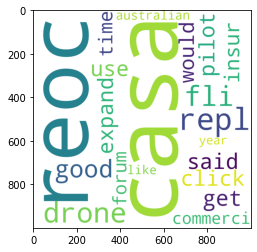

In [ ]:
# Top 20 Words in Commercial posts
comm_top20_tuples = most_frequent_words([word for post in dfCommercial.stemmed_text for word in post], 20)
comm_top20_dictionary = convert_tuples_to_dictionary(comm_top20_tuples)
print(comm_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
comm_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(comm_top20_dictionary)
plt.imshow(comm_top20_wordcloud)

{'fli': 6922, 'drone': 6589, 'said': 2831, 'casa': 2523, 'click': 2415, 'expand': 2389, 'rule': 2357, 'would': 2182, 'use': 1864, 'get': 1790, 'peopl': 1776, 'like': 1764, 'time': 1554, 'flight': 1499, 'know': 1429, 'see': 1411, 'one': 1313, 'go': 1276, 'take': 1178, 'pilot': 1165}


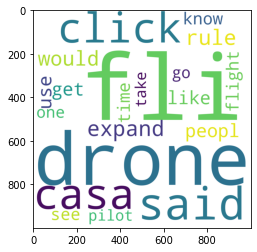

In [ ]:
# Top 20 Words in Commercial posts
priv_top20_tuples = most_frequent_words([word for post in dfPrivate.stemmed_text for word in post], 20)
priv_top20_dictionary = convert_tuples_to_dictionary(priv_top20_tuples)
print(priv_top20_dictionary)

# WordCloud for Top 20 Words in Commercial posts
priv_top20_wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=20, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(priv_top20_dictionary)
plt.imshow(priv_top20_wordcloud)

These simple WordClouds are not significant - but still interesting.

**Commercial** users require **Remote Operator Certificate** (known as the **'ReOc'**). This ReOc is extremely difficult and expensive to obtain, onerous to report on and comply with, it allows businesses to provide commercial drone services - and it is the bane of commercial operators' existences. So to see that in the WordCloud for these operators is encouraging.

**References**

CommercialDronePilots.com: https://CommercialDronePilots.com

Drone Industry Insights. (2021). Drone Manufacturers Ranking. Retrieved from 
Drone Industry Insights: https://droneii.com/product/drone-manufacturers-ranking

FPVDronePilots. (2021). FPVDronePilots.com. Retrieved from FPVDronePilots.com: https://FPVDronePilots

InspirePilots. (2021). InspirePilots.com. Retrieved from InspirePilots.com: https://InspirePilots.com

MatricePilots. (2021). MatricePilots.com. Retrieved from MatricePilots.com: https://MatricePilots.com

MavicPilots. (2021). MavicPilots.com. Retrieved from MavicPilots.com: https://MavicPilots.com

PhantomPilots. (2021). PhantomPilots.com. Retrieved from PhantomPilots.com: https://phantompilots.com/


